In [78]:
# Simulate MCMC model data: pick the true parameter variables from the model's prior distribution.
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from scipy.stats import invgamma
from numpy.linalg import norm, svd

In [79]:
# Number of persons.
P = 100
# Number of items.
I = 40
# Number of latent ability dimensions (sub-scales).
C = 5

In [80]:
# Generate latent ability distribution variances.
alpha_theta, beta_theta = 1, 1
rv = invgamma(a=alpha_theta, scale=beta_theta)
v = rv.rvs(C)
print(v)

[0.77029928 0.45871276 6.50983243 0.88676884 0.88238936]


(100, 5)


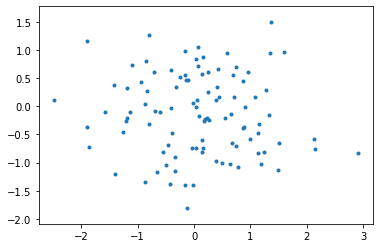

In [81]:
# Generate normally distributed student latent abilities.
cov = np.diag(v)
theta = np.random.multivariate_normal(np.zeros((C,)), cov, P)
print(theta.shape)
plt.plot(theta[:,0], theta[:,1], '.')
plt.axis('equal')
plt.show()

In [82]:
# Generate item difficulty parameters.
# Discrimination is uniform[0.5, 1.5].
a = np.random.random(size=(I,)) + 0.5
# Difficulty is equally spaced from -3 to 3.
b = np.linspace(-3, 3, num=I)
# Item i measures sub-scale c[i]. Select about the same number of items per subscale,
# then randomly permute the item order.
c = np.random.permutation(np.matlib.repmat(np.arange(C, dtype=int), int(np.ceil(I/C)), 1).ravel()[:I])
# Asymptote pi is fixed.
asym = 0.2
print(a)
print(b)
print(c)

[1.13143441 1.34547169 0.92308107 1.24307527 1.42234522 1.16684275
 1.42482982 0.59374942 1.10979645 0.58878132 0.6123184  1.17345338
 1.3913048  1.40415604 0.51587814 1.24335377 1.32225149 1.00293853
 0.59990867 1.35402027 1.15170984 1.26653482 0.78818229 1.08209953
 0.99405914 0.90634424 1.19210029 1.31775714 1.22259056 0.52591381
 0.73734557 1.20360223 1.41511125 1.48758405 1.45774818 1.14103477
 1.41089402 1.03498681 1.22863691 0.52653189]
[-3.         -2.84615385 -2.69230769 -2.53846154 -2.38461538 -2.23076923
 -2.07692308 -1.92307692 -1.76923077 -1.61538462 -1.46153846 -1.30769231
 -1.15384615 -1.         -0.84615385 -0.69230769 -0.53846154 -0.38461538
 -0.23076923 -0.07692308  0.07692308  0.23076923  0.38461538  0.53846154
  0.69230769  0.84615385  1.          1.15384615  1.30769231  1.46153846
  1.61538462  1.76923077  1.92307692  2.07692308  2.23076923  2.38461538
  2.53846154  2.69230769  2.84615385  3.        ]
[3 0 4 2 4 4 3 0 0 0 0 2 3 2 1 2 1 2 3 3 3 1 0 1 4 2 3 1 0 1 3 1

In [83]:
# Generate item responses (the observed data).
t = np.exp(-a*(theta[:,c] - b))
p_correct = asym + (1-asym)*(t/(1+t))
X = np.random.binomial(1, p=p_correct)

In [84]:
# Initial guess for theta_p^c: fraction of correct responses of person p to items measuring
# sub-scale c.
theta_init = np.array([np.mean(X[:, np.where(c == d)[0]], axis=1) for d in range(C)])

In [85]:
u, s, vh = svd(X)

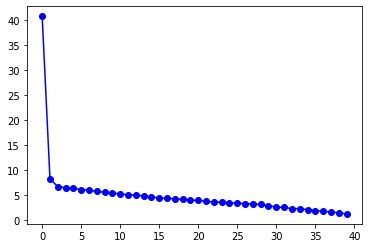

In [86]:
plt.plot(s, 'bo-')

In [87]:
print(vh.shape)
for r in range(1, X.shape[1] + 1, 5):
    P = vh[:r].transpose()
    print(r, norm(X - (X.dot(P)).dot(P.transpose())) / norm(X))

r = 5
P = vh[:r].transpose()
t = X.dot(P)
X_reconstructed = t.dot(P.transpose())
print(X.shape, P.shape, XC.shape)
print(P[:3])
print(t[:4])
print(X[3:])
print(X_reconstructed[3:])

(40, 40)
1 0.5494971087541795
6 0.4535083819419866
11 0.3755071368539594
16 0.3059760110634788
21 0.24164304353034258
26 0.18028646342539847
31 0.11694505385737489
36 0.060776845924931155
(100, 40) (40, 5) (100, 5)
[[-0.05541413  0.01100972 -0.23793286  0.09989172 -0.0440485 ]
 [-0.05449058  0.00955957 -0.23901792  0.06816821  0.11880001]
 [-0.06742539  0.06901474  0.30015364  0.01398892 -0.13412027]]
[[-4.37826428  0.37317813 -0.48935847 -0.44185103 -0.15059675]
 [-4.06671811 -1.20736785  0.3477081  -0.69718694 -0.39422779]
 [-4.47540691  0.59616094  0.11880829 -0.22837614  0.13819566]
 [-3.68499763  0.72820866 -0.92378656 -0.28777624  0.01462911]]
[[1 0 0 ... 1 0 0]
 [1 0 1 ... 1 0 1]
 [1 1 0 ... 1 1 1]
 ...
 [0 1 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
[[0.40262663 0.41068132 0.01545389 ... 0.93909368 0.73298508 0.79825325]
 [0.26806201 0.16611745 0.44245886 ... 0.78910164 0.58887043 0.77889447]
 [0.6290119  0.52509516 0.05886047 ... 1.19370367 0.87532406 1.03579425]
 ..

In [88]:
np.mean(t, axis=0)

array([-4.05228696e+00,  2.02138345e-02, -1.31263562e-02,  4.56183901e-03,
       -2.08968161e-04])

In [90]:
np.mean(X, axis=0)

array([0.23, 0.22, 0.27, 0.31, 0.19, 0.29, 0.31, 0.37, 0.34, 0.5 , 0.44,
       0.46, 0.37, 0.41, 0.59, 0.48, 0.55, 0.47, 0.57, 0.61, 0.55, 0.65,
       0.59, 0.71, 0.72, 0.66, 0.81, 0.8 , 0.83, 0.75, 0.77, 0.9 , 0.93,
       0.93, 0.95, 0.9 , 0.84, 0.94, 0.83, 0.85])